# SVM Classification Model

# Project Overview:

In this project, We will explore, analyze, and model a dataset using SVM to predict an outcome (classification).

## Tasks:

1. **Dataset:**
   - Find a dataset containing more than 10,000 records and at least 20 features.

2. **Exploratory Data Analysis (EDA):**
   - Conduct a thorough EDA to uncover patterns, anomalies, trends, and relationships within the data. Visualizations should be used to help understand the distribution of data and the relationships between features.

3. **Data Cleaning:**
   - This should cover issues like missing values, outliers, and inaccurate data entries.

4. **Dimensionality Reduction:**
   - Implement dimensionality reduction technique(s) to reduce the number of features while retaining helpful information.

5. **SVM Model Development:**
   - Build an SVM model, focusing on classification. The model should be robust, and its parameters should be fine-tuned to get optimal performance. Evaluating the model using appropriate metrics.

6. **Balancing the Unbalanced Data:**
   - Employ techniques to balance unbalanced data if necessary, ensuring the model's reliability and generalizability.

7. **Testing:**
   - Test the trained SVM model on unseen data to assess its performance and validate its effectiveness in real-world scenarios.

## Notebook Content:

- **Dataset Selection and Description:**
  - Details about the selected dataset, including its source, size, and features.
- **Exploratory Data Analysis (EDA):**
  - Comprehensive EDA to uncover patterns, anomalies, and trends.
- **Data Cleaning:**
  - Steps taken to address missing values, outliers, and inaccurate data entries.
- **Dimensionality Reduction:**
  - Implementation of dimensionality reduction techniques.
- **SVM Model Development:**
  - Building and fine-tuning the SVM model.
- **Model Evaluation:**
  - Performance evaluation of the SVM model using appropriate metrics.
- **Balancing Unbalanced Data:**
  - Techniques employed to balance unbalanced data.
- **Testing and Validation:**
  - Testing the trained SVM model on unseen data to assess its performance.


In [ ]:
!pip install opendatasets

In [ ]:
# Import necessary libraries
import opendatasets as od  # For downloading datasets
import pandas as pd  # For data manipulation and analysis
import numpy as np  # For numerical operations
import matplotlib.pyplot as plt  # For data visualization
import seaborn as sns  # For statistical data visualization
%matplotlib inline

# Importing machine learning libraries
from sklearn.model_selection import train_test_split  # For splitting data into train and test sets
from sklearn.preprocessing import StandardScaler, OneHotEncoder  # For preprocessing data
from sklearn.decomposition import PCA  # For Principal Component Analysis
from sklearn.compose import ColumnTransformer  # For column transformations
from sklearn.pipeline import Pipeline  # For creating pipelines
from sklearn.svm import SVC  # Support Vector Classifier
from sklearn.model_selection import cross_val_score
import imblearn
from imblearn.over_sampling import RandomOverSampler ### For the imbalanced data
from collections import Counter # to count the balanced data
# Importing evaluation metrics
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, precision_score, recall_score ,classification_report , accuracy_score
import sklearn.metrics as metrics
from sklearn.svm import SVR

In [ ]:
od.download("https://www.kaggle.com/datasets/henriqueyamahata/bank-marketing")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: omarali13
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/henriqueyamahata/bank-marketing


100%|██████████| 393k/393k [00:00<00:00, 576kB/s]

# Information about the dataset
### The data is related with direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed.

In [ ]:
file_path = "/content/bank-marketing/bank-additional-full.csv"
df = pd.read_csv(file_path, sep=';')

In [ ]:
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


### Apply the mapping to the 'y' column of the DataFrame using the map() function, This replaces 'yes' with 1 and 'no' with 0



In [ ]:
# Mapping dictionary: maps 'yes' to 1 and 'no' to 0
mapping = {'yes': 1, 'no': 0}

# Apply the mapping to the 'y' column of the DataFrame using the map() function
# This replaces 'yes' with 1 and 'no' with 0
df['y'] = df['y'].map(mapping)

df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,1
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,0
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,0
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,1


In [ ]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,41188.0,40.024060,10.421250,17.000,32.000,38.000,47.000,98.000
duration,41188.0,258.285010,259.279249,0.000,102.000,180.000,319.000,4918.000
campaign,41188.0,2.567593,2.770014,1.000,1.000,2.000,3.000,56.000
pdays,41188.0,962.475454,186.910907,0.000,999.000,999.000,999.000,999.000
previous,41188.0,0.172963,0.494901,0.000,0.000,0.000,0.000,7.000
emp.var.rate,41188.0,0.081886,1.570960,-3.400,-1.800,1.100,1.400,1.400
cons.price.idx,41188.0,93.575664,0.578840,92.201,93.075,93.749,93.994,94.767
cons.conf.idx,41188.0,-40.502600,4.628198,-50.800,-42.700,-41.800,-36.400,-26.900
euribor3m,41188.0,3.621291,1.734447,0.634,1.344,4.857,4.961,5.045
nr.employed,41188.0,5167.035911,72.251528,4963.600,5099.100,5191.000,5228.100,5228.100


### df.info()

The `df.info()` method in pandas is used to display concise summary information about a DataFrame. This information includes:

* **Data type information:** It shows the data type (e.g., integer, string, object) of each column in the DataFrame. This helps you understand the kind of data each column holds.
* **Non-null count:** This indicates the number of non-null (not missing) values in each column. It's helpful to identify if there are any missing values in your data and how many.
* **Memory usage:** This displays the approximate memory usage of the DataFrame. This can be useful for understanding how much memory your data is consuming, especially when working with large datasets.


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [ ]:
# Remove duplicate rows from the DataFrame
# inplace = True modifies the DataFrame in place (no need to assign the result to a new variable)
# ignore_index = True resets the index after dropping duplicates
df.drop_duplicates(inplace = True, ignore_index = True)

# Print the shape of the DataFrame after dropping duplicates
# This will show the number of rows and columns in the DataFrame
print("Shape of DataFrame after removing duplicates:", df.shape)

df

Shape of DataFrame after removing duplicates: (41176, 21)


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41171,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,1
41172,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,0
41173,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,0
41174,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,1


In [ ]:
# Display concise summary information about the DataFrame
# This includes the data types, non-null counts, and memory usage
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41176 entries, 0 to 41175
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41176 non-null  int64  
 1   job             41176 non-null  object 
 2   marital         41176 non-null  object 
 3   education       41176 non-null  object 
 4   default         41176 non-null  object 
 5   housing         41176 non-null  object 
 6   loan            41176 non-null  object 
 7   contact         41176 non-null  object 
 8   month           41176 non-null  object 
 9   day_of_week     41176 non-null  object 
 10  duration        41176 non-null  int64  
 11  campaign        41176 non-null  int64  
 12  pdays           41176 non-null  int64  
 13  previous        41176 non-null  int64  
 14  poutcome        41176 non-null  object 
 15  emp.var.rate    41176 non-null  float64
 16  cons.price.idx  41176 non-null  float64
 17  cons.conf.idx   41176 non-null 

In [ ]:
# Check for missing values in each column of the DataFrame
# The isnull() method returns a DataFrame of the same shape as df, where each cell is True if the corresponding value in df is missing, and False otherwise
# The sum() method calculates the total number of missing values in each column by summing the True values (True is treated as 1 and False as 0)
missing_values = df.isnull().sum()

# Print the total number of missing values in each column
# This provides a summary of missing values in the DataFrame, showing how many missing values are there in each column
print(missing_values)


age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64


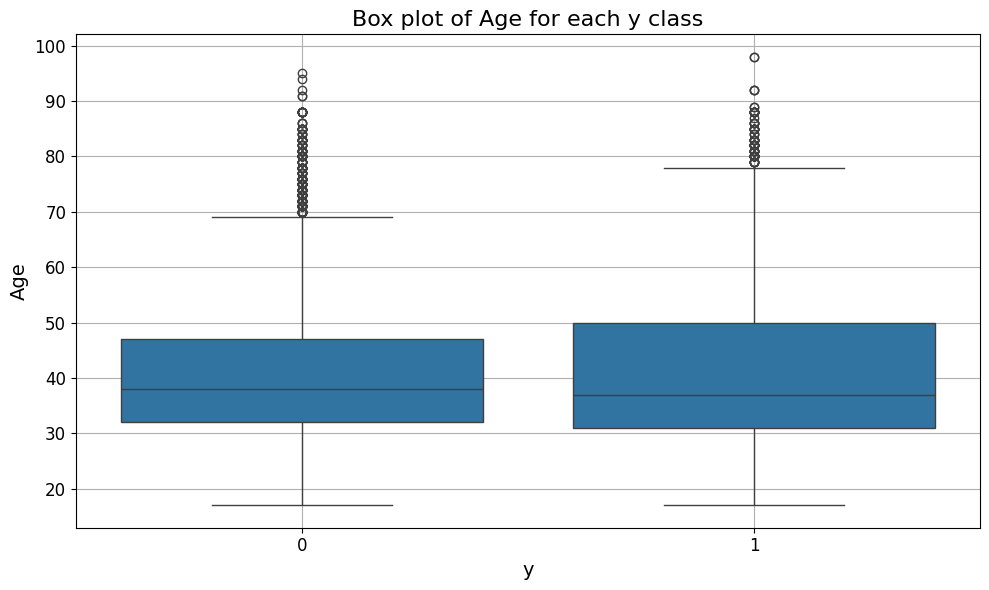

In [ ]:
# Plot box plots of 'Age' for each target class
plt.figure(figsize=(10, 6))  # Set the figure size
plt.title('Box plot of Age for each y class', fontsize=16)  # Set the plot title
sns.boxplot(x='y', y='age', data=df)  # Create the box plot
plt.xlabel('y', fontsize=14)  # Set the x-axis label
plt.ylabel('Age', fontsize=14)  # Set the y-axis label
plt.xticks(fontsize=12)  # Set the font size of x-axis ticks
plt.yticks(fontsize=12)  # Set the font size of y-axis ticks
plt.grid(True)  # Show grid lines
plt.tight_layout()  # Adjust layout to prevent overlap of labels
plt.show()  # Display the plot

## The following plot let us check if the data is imbalance or not and we can the that the data is imbalamced by plotting the count of each unique value in the target class

y
0    88.733728
1    11.266272
Name: count, dtype: float64



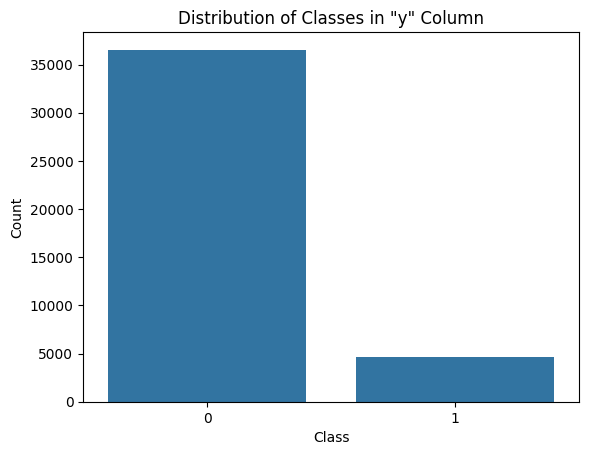

In [ ]:
# Calculate the percentage of each class in the 'y' column and print the result
class_distribution = df["y"].value_counts() / len(df) * 100
print(class_distribution)
print()  # Print an empty line for better readability

# Plot a count plot of the 'y' column
# This visualization shows the distribution of classes in the 'y' column
sns.countplot(data=df, x='y')
plt.title('Distribution of Classes in "y" Column')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()


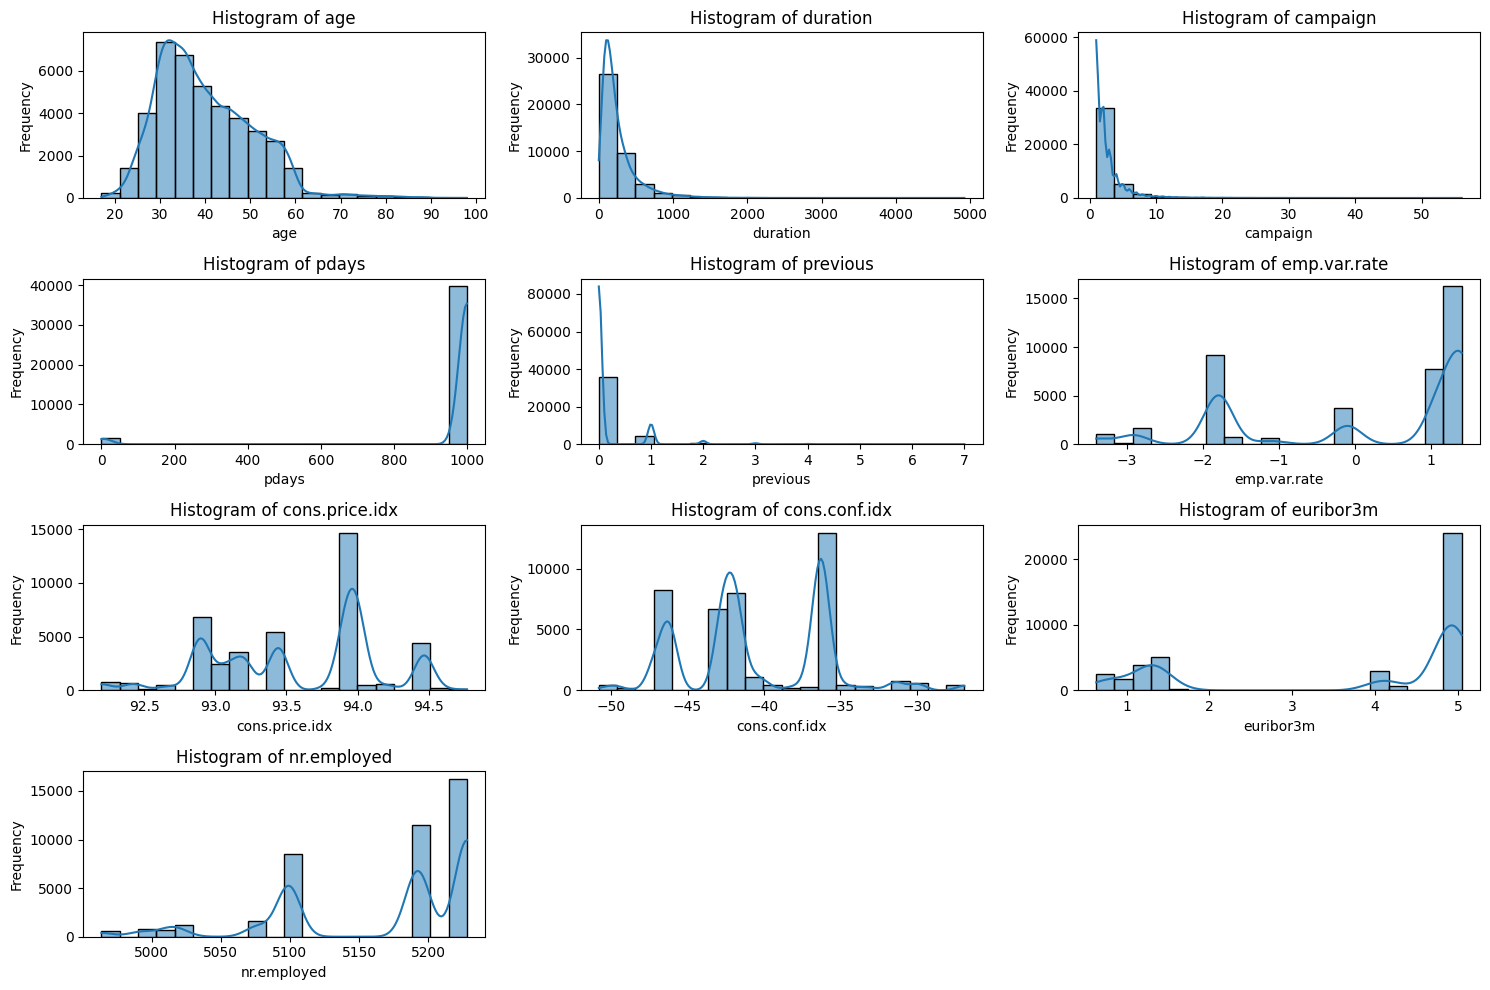

In [ ]:
# Number of rows and columns for subplots
num_rows = 4  # Total number of numerical columns divided by 3, rounded up
num_cols = 3

# List of numerical columns to visualize
numerical_cols = ['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate',
                  'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']


# Calculate total number of subplots needed
total_plots = len(numerical_cols)

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 10))

# Flatten the axes array
axes = axes.flatten()

# Iterate over each numerical column and plot histogram
for i, col in enumerate(numerical_cols):
    # Plot histogram using seaborn histplot
    sns.histplot(df[col], bins=20, kde=True, ax=axes[i])

    # Set plot title
    axes[i].set_title(f'Histogram of {col}')

    # Set x-axis label
    axes[i].set_xlabel(col)

    # Set y-axis label
    axes[i].set_ylabel('Frequency')

# Hide any unused subplots
for i in range(total_plots, num_rows * num_cols):
    fig.delaxes(axes[i])

# Adjust layout
plt.tight_layout()

# Display the plots
plt.show()


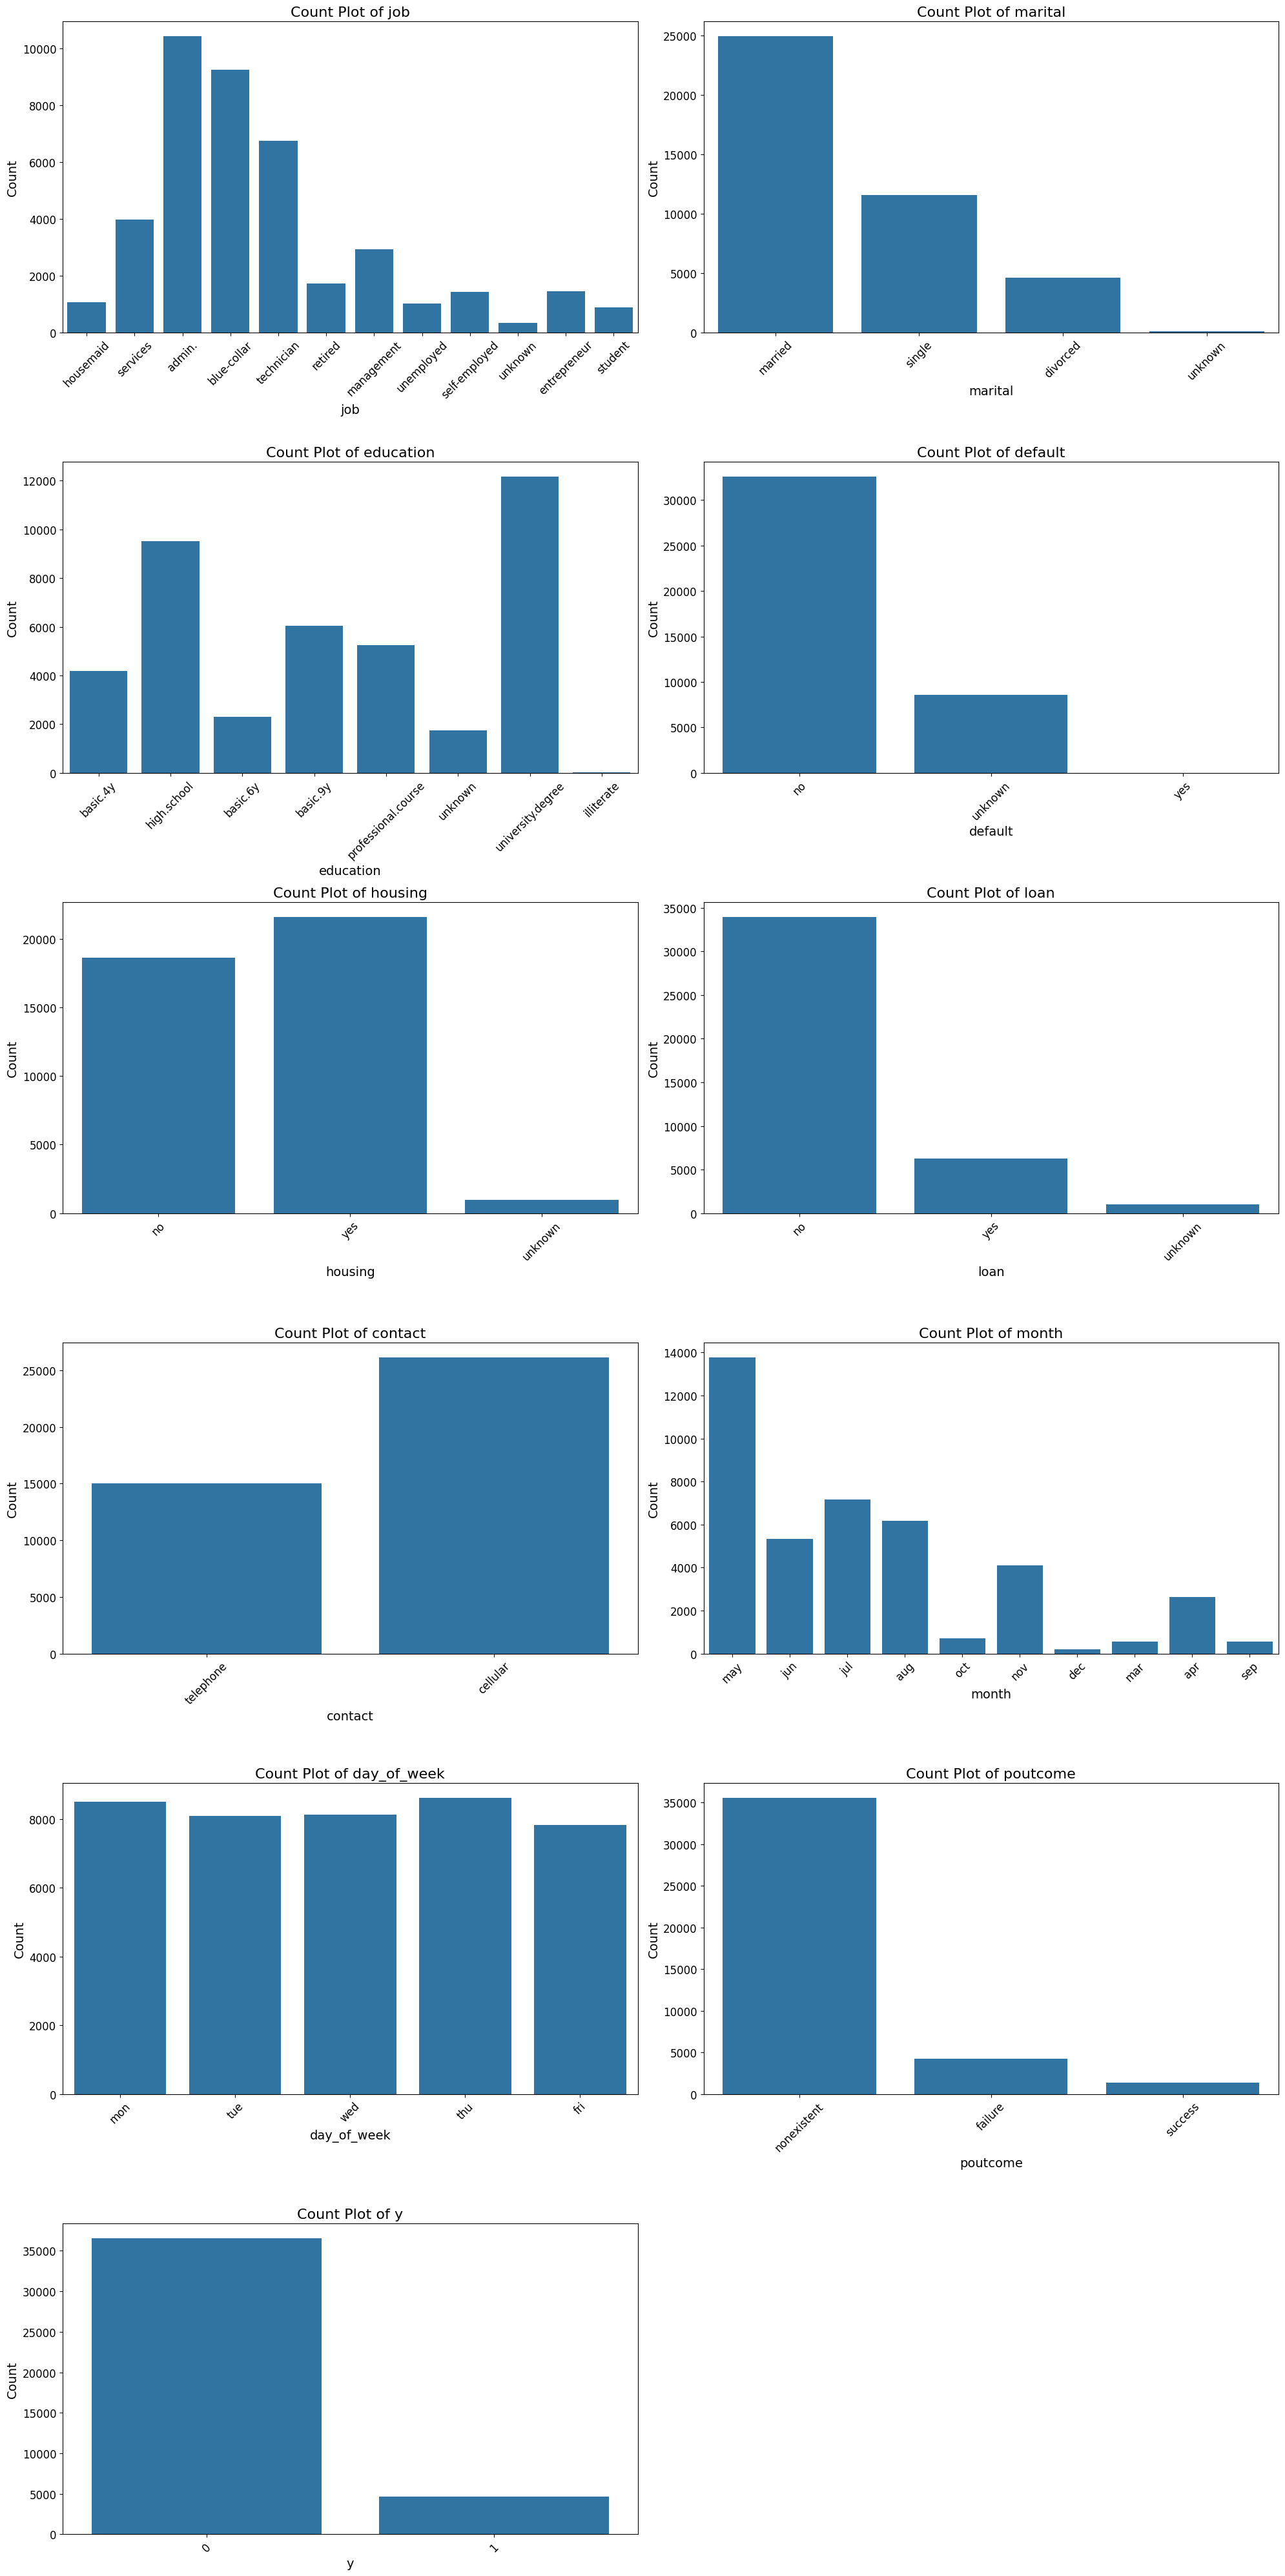

In [ ]:
# List of categorical columns to visualize
categorical_cols = ['job', 'marital', 'education', 'default', 'housing', 'loan',
                    'contact', 'month', 'day_of_week', 'poutcome', 'y']

# Number of rows and columns for subplots
num_rows = 6  # Total number of categorical columns divided by 2, rounded up
num_cols = 2

# Calculate total number of subplots needed
total_plots = len(categorical_cols)

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 40))

# Flatten the axes array
axes = axes.flatten()

# Iterate over each categorical column and plot count plot
for i, col in enumerate(categorical_cols):
    # Plot count plot using seaborn countplot
    sns.countplot(data=df, x=col, ax=axes[i])

    # Set plot title
    axes[i].set_title(f'Count Plot of {col}', fontsize=16)

    # Set x-axis label
    axes[i].set_xlabel(col, fontsize=14)

    # Set y-axis label
    axes[i].set_ylabel('Count', fontsize=14)

    # Rotate x-axis labels for better readability
    axes[i].tick_params(axis='x', rotation=45)

    # Set font size of tick labels
    axes[i].tick_params(axis='both', which='major', labelsize=12)

# Hide any unused subplots
for i in range(total_plots, num_rows * num_cols):
    fig.delaxes(axes[i])

# Adjust layout
plt.tight_layout()

# Display the plots
plt.show()


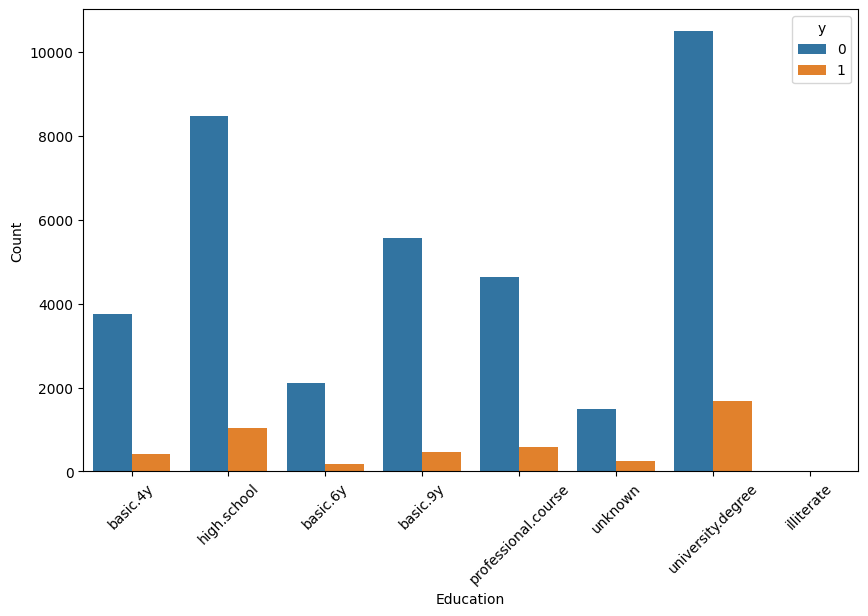

In [ ]:
# Create a figure with a specified size
plt.figure(figsize=(10, 6))

# Plot a count plot with hue
sns.countplot(data=df, x='education', hue='y')

# Set x-axis label
plt.xlabel('Education')

# Set y-axis label
plt.ylabel('Count')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Add legend with title and specify its location
plt.legend(title='y', loc='upper right')

# Display the plot
plt.show()

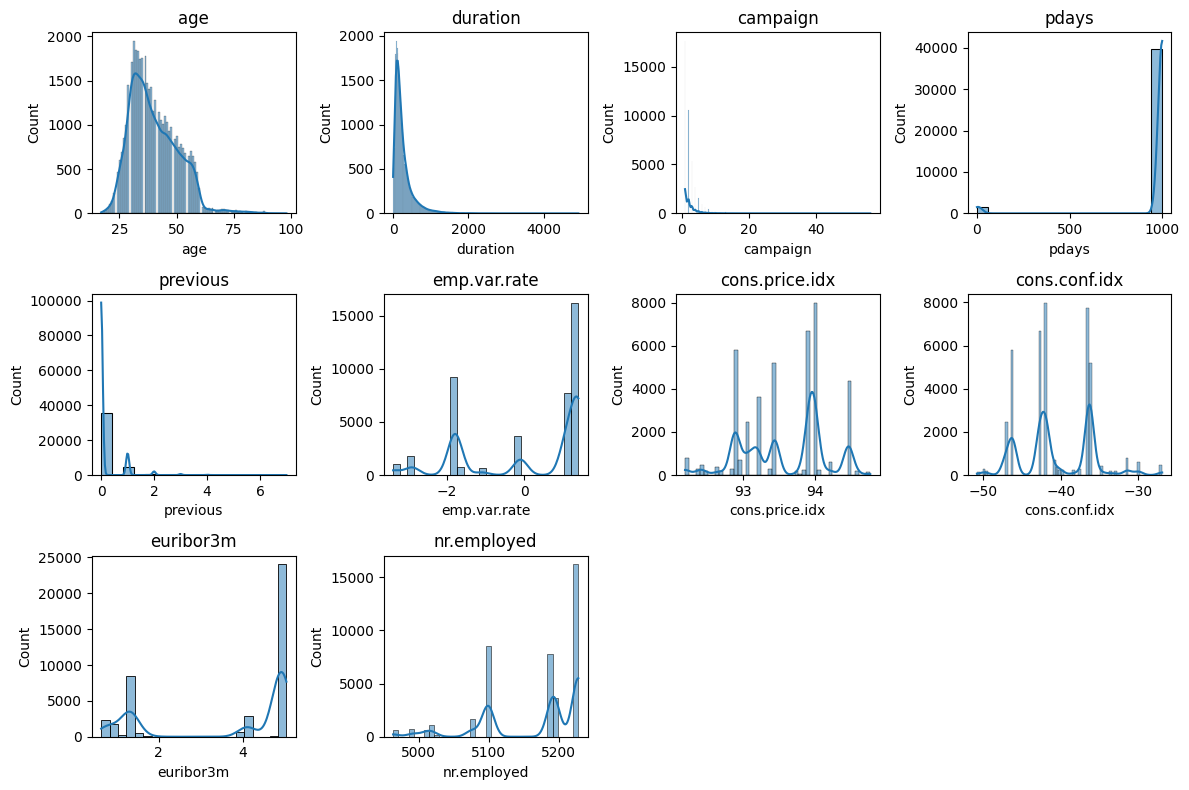

In [ ]:
# Create a figure with a specified size
plt.figure(figsize=(12, 8))

# Iterate over each numerical column and plot histogram
for i, col in enumerate(numerical_cols):
    # Create subplots with 3 rows and 4 columns
    plt.subplot(3, 4, i+1)

    # Plot histogram using seaborn histplot
    sns.histplot(df[col], kde=True)

    # Set title for the subplot
    plt.title(col)

# Adjust layout
plt.tight_layout()

# Display the plot
plt.show()


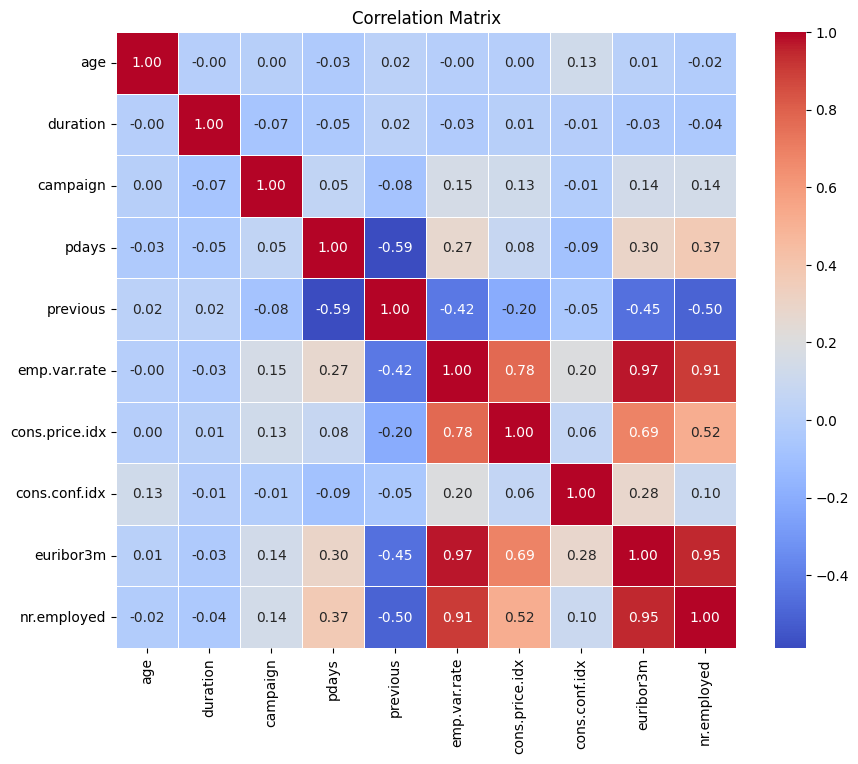

In [ ]:
# Correlation matrix
correlation_matrix = df[numerical_cols].corr()

# Heatmap of correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

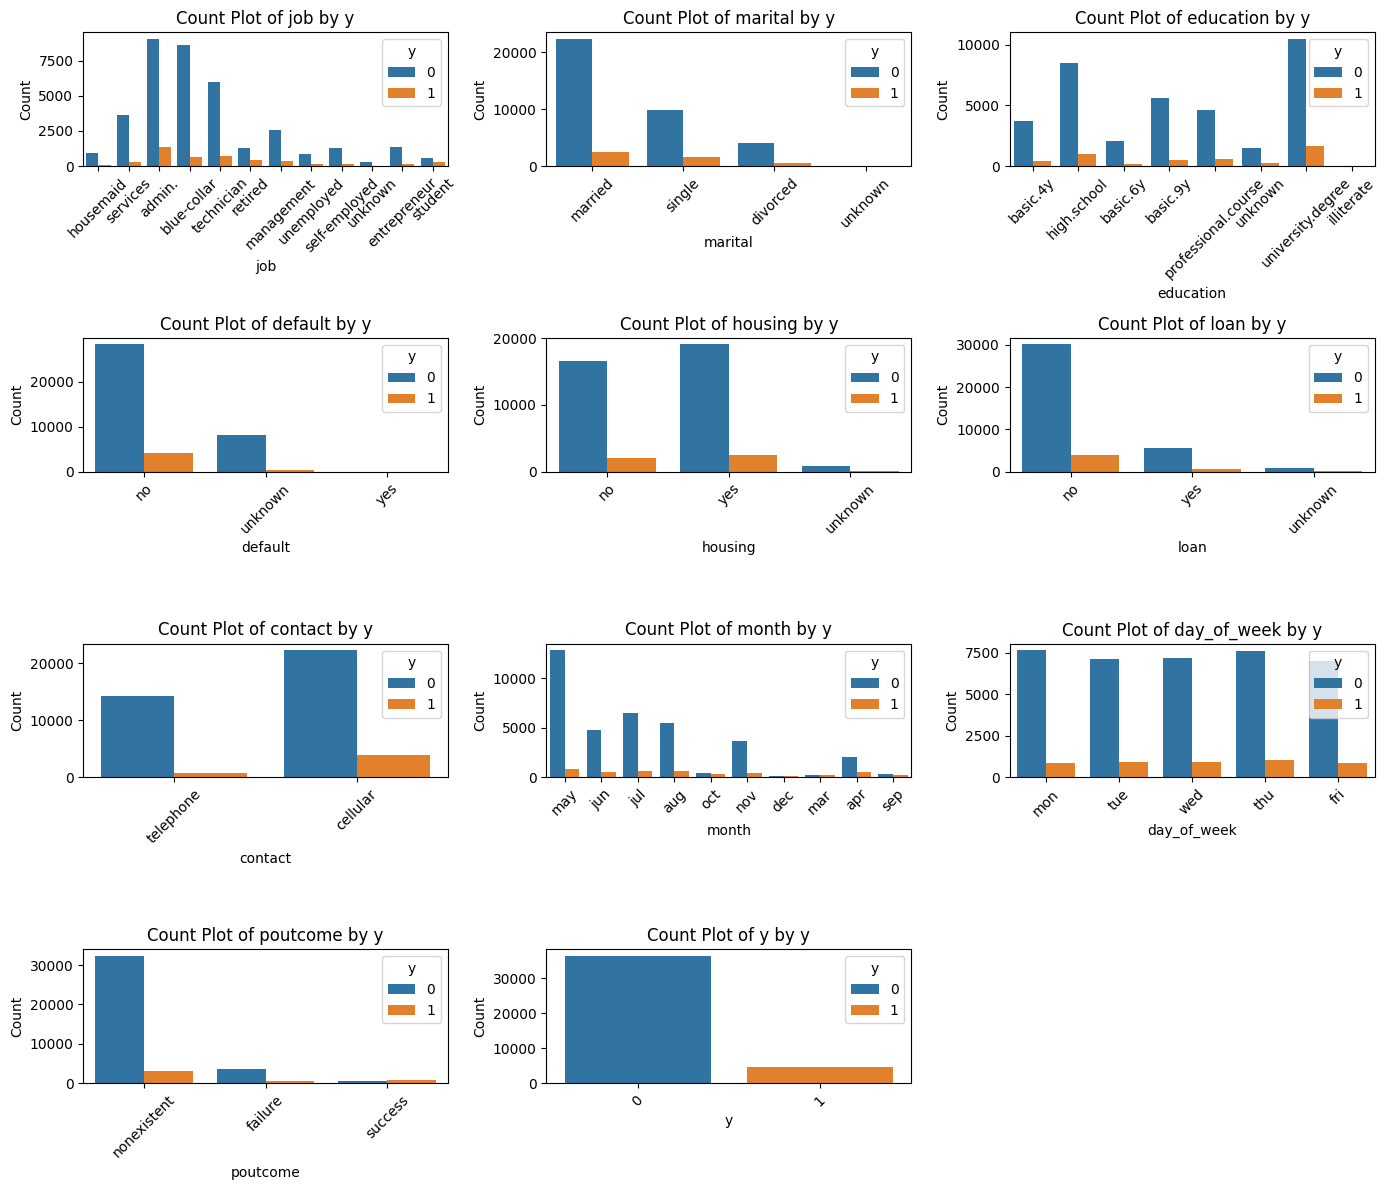

In [ ]:
# Create a figure with a specified size
plt.figure(figsize=(14, 12))

# Iterate over each categorical column and plot count plot with hue
for i, col in enumerate(categorical_cols):
    # Create subplots with 4 rows and 3 columns
    plt.subplot(4, 3, i+1)

    # Plot count plot using seaborn countplot with hue
    sns.countplot(data=df, x=col, hue='y')

    # Set title for the subplot
    plt.title(f'Count Plot of {col} by y')

    # Set x-axis label
    plt.xlabel(col)

    # Set y-axis label
    plt.ylabel('Count')

    # Rotate x-axis labels for better readability
    plt.xticks(rotation=45)

# Adjust layout
plt.tight_layout()

# Display the plot
plt.show()

In [ ]:
X = df.drop(columns = ['y'])  # Replace 'target_column_name' with the name of your target variable column
y = df['y']

ros = RandomOverSampler(random_state=42)
bal_x, bal_y = ros.fit_resample(X , y)
print('Original dataset shape', Counter(y))
print('Resample dataset shape', Counter(bal_y))

Original dataset shape Counter({0: 36537, 1: 4639})
Resample dataset shape Counter({0: 36537, 1: 36537})


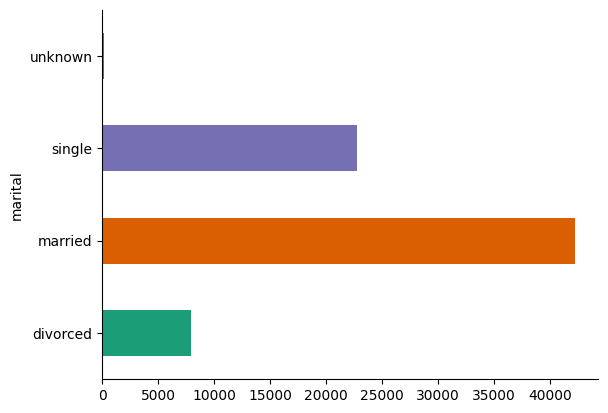

In [ ]:
bal_x.groupby('marital').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

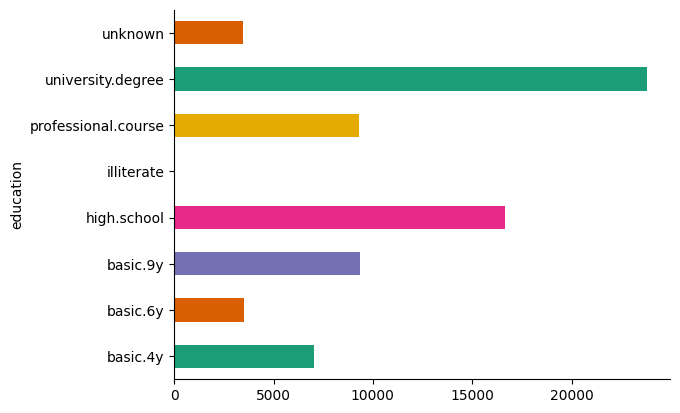

In [ ]:
bal_x.groupby('education').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

<ipython-input-49-6f84863d6239>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(bal_x, x='age', y='marital', inner='box', palette='Dark2')


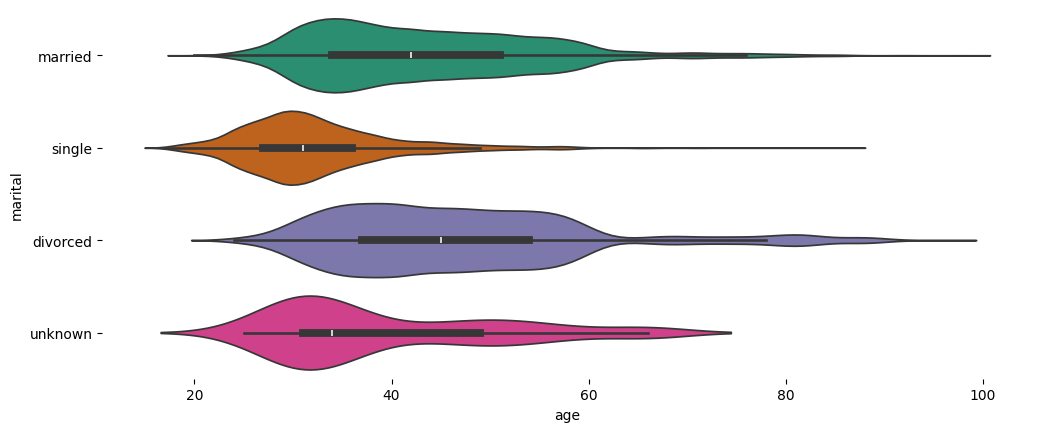

In [ ]:
figsize = (12, 1.2 * len(bal_x['marital'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(bal_x, x='age', y='marital', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<ipython-input-50-476e393df0cc>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(bal_x, x='age', y='education', inner='box', palette='Dark2')


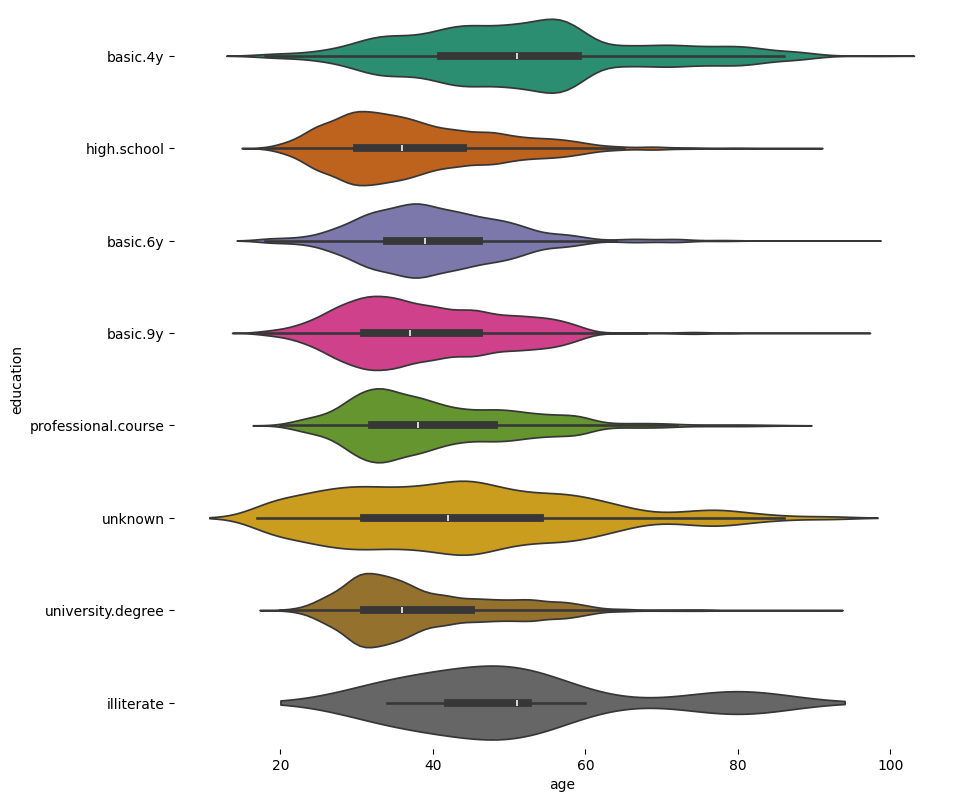

In [ ]:
figsize = (10, 1.2 * len(bal_x['education'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(bal_x, x='age', y='education', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(bal_x, bal_y, test_size = 0.2, random_state = 42)

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (58459, 20)
Shape of X_test: (14615, 20)
Shape of y_train: (58459,)
Shape of y_test: (14615,)


## Function to Find Optimal Number of Components for PCA

This Python function, `find_optimal_n_components`, helps determine the optimal number of components to use in Principal Component Analysis (PCA). PCA is a dimensionality reduction technique commonly used in machine learning and data analysis. It aims to capture the most significant variation in a dataset with a smaller number of features (components).

**Function Breakdown:**

1. **Parameters:**
   - `X_train`: This represents the training data, assumed to be a 2D NumPy array where each row represents a sample and each column represents a feature.
   - `explained_variance_threshold` (optional, default=0.95): This parameter specifies the minimum proportion of variance you want to retain in the reduced-dimension dataset. Values closer to 1 indicate capturing a higher percentage of variance.

2. **Finding the Component Range:**
   - `components_range`: This line defines a range of possible values for the number of components (features) to consider in PCA. It starts from 1 (at least one component) and goes up to the minimum of the number of samples (rows) and features (columns) in the training data `X_train`. This ensures the component range stays within the data's dimensionality.

3. **Cross-Validation for Evaluation:**
   - `cv_scores`: This list will store the average cross-validation (CV) scores for each number of components tried.
   - The loop iterates through the `components_range`:
      - Inside the loop:
         - A PCA model is created (`pca`) with the current number of components (`n_components`).
         - `cross_val_score` is used to perform 5-fold cross-validation on the PCA model using the training data (`X_train`). This estimates the model's generalization performance on unseen data.
         - The average score across the folds is calculated using `np.mean(scores)`.
         - This average score is appended to the `cv_scores` list.

4. **Finding the Optimal Number of Components:**
   - `np.argmax(cv_scores)` finds the index of the maximum value in the `cv_scores` list. This corresponds to the number of components that achieved the highest average CV score.
   - `optimal_n_components`: This variable is assigned the value from `components_range` at the index found by `np.argmax`. It represents the number of components that yielded the best CV performance.

5. **Printing and Returning the Result:**
   - The function prints a message indicating the optimal number of components based on cross-validation.
   - Finally, the function returns the `optimal_n_components` value, which can be used to create a PCA model with the most suitable number of components for your data.



In [ ]:
# Function to find optimal number of components for PCA
def find_optimal_n_components(X_train, explained_variance_threshold = 0.95):
    # Define a range of components to try
        components_range = range(1, min(X_train.shape[0], X_train.shape[1]) + 1)

        cv_scores = []
        for n_components in components_range:
              pca = PCA(n_components=n_components)
              scores = cross_val_score(pca, X_train, cv=5)  # 5-fold cross-validation
              cv_scores.append(np.mean(scores))
        optimal_n_components = components_range[np.argmax(cv_scores)]

        print(f'Optimal number of components based on cross-validation: {optimal_n_components}')
        return optimal_n_components

## Preprocessing Steps for Numerical and Categorical Features

**1. Preprocessing Transformers:**

- **`numerical_transformer = StandardScaler()`**: This line creates a transformer object for scaling numerical features using the `StandardScaler` class. Standard scaling typically centers the data (mean = 0) and scales it to unit variance (standard deviation = 1). This can be beneficial for some machine learning algorithms that assume a specific data distribution for numerical features.
- **`categorical_transformer = OneHotEncoder()`**: This creates a transformer object for handling categorical features using the `OneHotEncoder` class. One-hot encoding converts categorical features into binary vectors, where each element represents a category. This allows machine learning models to understand the relationships between different categories.

**2. Feature Selection:**

- **`numerical_features = X.select_dtypes(include=['int', 'float']).columns`**: This line identifies the names of numerical columns in the data (`X`) by selecting columns with data types 'int' or 'float'.
- **`categorical_features = X.select_dtypes(include=['object']).columns`**: Similarly, this line selects the names of categorical columns by filtering for data type 'object' (typically used for textual data).

**3. Combining Preprocessing with ColumnTransformer:**

- **`preprocessor = ColumnTransformer(...)`**: This creates a `ColumnTransformer` object that allows you to apply different preprocessing steps to different sets of features in your data. Here, it defines two transformers:
    - `'num'`: This key identifies the transformer for numerical features (`numerical_transformer`).
    - `'cat'`: This key identifies the transformer for categorical features (`categorical_transformer`).
- **`numerical_features`**: This specifies the list of column names (numerical features) on which the `numerical_transformer` should be applied.
- **`categorical_features`**: This specifies the list of column names (categorical features) on which the `categorical_transformer` should be applied.

**4. Preprocessing Training Data:**

- **`X_train_preprocessed = preprocessor.fit_transform(X_train)`**: This line performs the actual preprocessing on the training data (`X_train`). The `ColumnTransformer` fits the transformers to the training data (learning the parameters for scaling and encoding) and then transforms the data based on the learned parameters.

**5. Finding Optimal Number of Components for PCA (Optional):**

- This section (assuming the code for `find_optimal_n_components` is included) demonstrates how to find the optimal number of components for Principal Component Analysis (PCA). PCA is a dimensionality reduction technique that can be applied after preprocessing to further reduce the number of features while retaining most of the information.
- The function `find_optimal_n_components` likely uses cross-validation to evaluate different PCA configurations and suggests an optimal number of components based on the results.

**6. PCA for Dimensionality Reduction (Optional):**

- **`pca = PCA(n_components=optimal_n_components)`**: This line creates a PCA model with the optimal number of components (obtained from the previous step or a chosen value).
- **`pipeline = Pipeline(steps=[('pca', pca)])`**: This creates a preprocessing pipeline using `Pipeline`. The pipeline allows you to chain preprocessing steps. Here, it includes only the PCA step.
- **`X_train_preprocessed_pca = pipeline.fit_transform(X_train_preprocessed)`**: This line fits the pipeline (PCA in this case) to the preprocessed training data (`X_train_preprocessed`) and then transforms the data using PCA.

**7. Preprocessing and Transforming Testing Data:**

- **`X_test_preprocessed_pca = pipeline.transform(preprocessor.transform(X_test))`**: This line first applies the `ColumnTransformer` to the testing data (`X_test`) for scaling and encoding, and then uses the fitted pipeline (including PCA) to transform the preprocessed testing data.

**8. Scree Plot for Explained Variance Ratio (Optional):**

- This section (assuming libraries like `plt` are imported) generates a Scree Plot to visualize the explained variance ratio by each principal component in the PCA model. This plot can help you decide if the chosen number of components captures enough of the variance in the data.




/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_base.py:76: RuntimeWarning: divide by zero encountered in divide
  precision.flat[:: len(precision) + 1] += 1.0 / exp_var_diff
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:794: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 117, in __call__
    score = scorer(estimator, *args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 444, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_pca.py", line 700, in score
    return np.mean(self.score_samples(X))
  File "/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_pca.py", line 675, in score_samples
    precision = self.get

Optimal number of components based on cross-validation: 54
Optimal number of components for PCA: 54


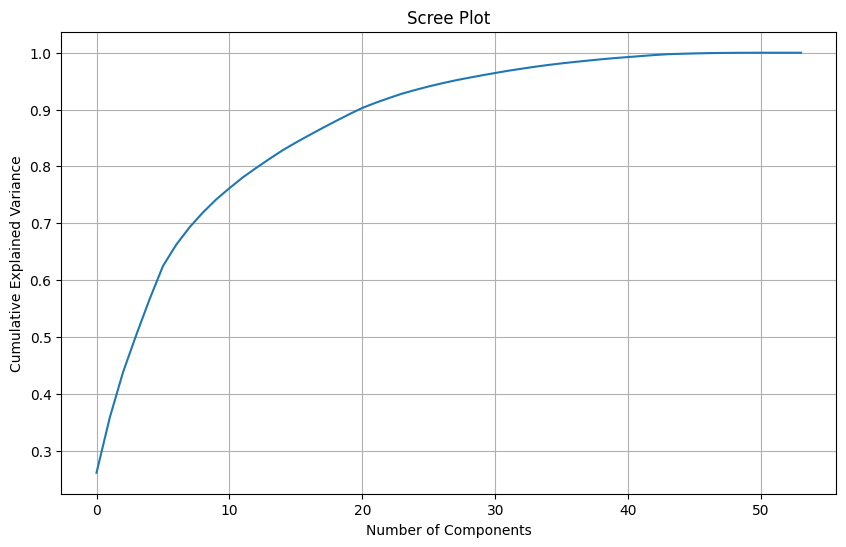

In [ ]:
# Preprocessing steps for numerical and categorical features
numerical_transformer = StandardScaler()
categorical_transformer = OneHotEncoder()

# Identify numerical and categorical features
numerical_features = X.select_dtypes(include=['int', 'float']).columns
categorical_features = X.select_dtypes(include=['object']).columns

# Combine preprocessing steps for numerical and categorical features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Fit and transform the training data using the preprocessor
X_train_preprocessed = preprocessor.fit_transform(X_train)

# Find optimal number of components for PCA
optimal_n_components = find_optimal_n_components(X_train_preprocessed)

# Print the number of optimal components
print(f'Optimal number of components for PCA: {optimal_n_components}')

# Add PCA for dimensionality reduction
pca = PCA(n_components=optimal_n_components)

# Create a preprocessing pipeline with PCA
pipeline = Pipeline(steps=[('pca', pca)])

# Fit and transform the training data
X_train_preprocessed_pca = pipeline.fit_transform(X_train_preprocessed)

# Transform the testing data
X_test_preprocessed_pca = pipeline.transform(preprocessor.transform(X_test))

# Generate Scree Plot to check explained variance ratio
plt.figure(figsize=(10, 6))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Scree Plot')
plt.grid(True)
plt.show()

# **Introduction to Support Vector Machines (SVM)**

Support Vector Machines (SVM) are sophisticated supervised learning models extensively utilized for classification and regression tasks. SVMs excel in scenarios where the number of features surpasses the number of samples or when confronted with high-dimensional data. The core principle underlying SVM is to identify the hyperplane that optimally segregates the classes within the feature space. This hyperplane is strategically positioned to maximize the margin between classes, with the support vectors, the data points nearest to the decision boundary, defining its position. SVMs leverage various kernel functions to map the input space into higher dimensions, facilitating the handling of non-linear classification tasks. Owing to their adaptability and efficacy, SVMs find applications across diverse domains, including but not limited to pattern recognition, image classification, and bioinformatics.


## Training and Predicting with SVC

**1. SVC Model Initialization:**

- `svc = SVC()`**: This line initializes a Support Vector Classifier model using the `SVC` class from scikit-learn. SVC is a powerful kernel-based algorithm for classification tasks. By default, it uses a linear kernel, which essentially performs linear classification in the transformed feature space (after PCA in this case).

**2. Training the SVC Model:**

- `svc.fit(X_train_preprocessed_pca, y_train)`**: This line trains the SVC model on the preprocessed training data (`X_train_preprocessed_pca`). Here, `X_train_preprocessed_pca` represents the training data that has been transformed using both the column transformer (for scaling and encoding) and potentially PCA (for dimensionality reduction). The `y_train` argument provides the corresponding target variable labels for the training data. During training, the SVC model learns the decision boundary that best separates the different classes in the transformed feature space.

**3. Predicting on New Data:**

- `y_pred = svc.predict(X_test_preprocessed_pca)`**: Once the SVC model is trained, this line uses it to predict the target variable labels for the testing data (`X_test_preprocessed_pca`). The testing data goes through the same preprocessing pipeline (column transformer and potentially PCA) as the training data to ensure consistency. The output, `y_pred`, is a NumPy array containing the predicted class labels for each sample in the testing data.

In [ ]:
# Initialize SVC
svc = SVC()

# Train the SVC model on reduced-dimensional training data
svc.fit(X_train_preprocessed_pca, y_train)

SVC()

In [ ]:
# Predict the target variable for the test data
y_pred = svc.predict(X_test_preprocessed_pca)


This code snippet demonstrates how to evaluate the performance of the trained SVC model on the testing data.

**1. Accuracy:**

- `accuracy = metrics.accuracy_score(y_test, y_pred)`**: This line calculates the accuracy score, which is the proportion of correctly classified samples in the testing data. The `metrics.accuracy_score` function from scikit-learn is used for this purpose.
- `print("Accuracy of SVC:", accuracy)`**: This line prints the calculated accuracy score.

**2. Confusion Matrix:**

- `cm = confusion_matrix(y_test, y_pred)`**: This line creates a confusion matrix using the `confusion_matrix` function. The confusion matrix is a table that summarizes the model's performance by showing how many samples from each class were predicted correctly and incorrectly.
- **Displaying the Confusion Matrix:**
    - `disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=svc.classes_)`**: This line creates a ConfusionMatrixDisplay object from scikit-learn to visualize the confusion matrix. It takes the calculated confusion matrix (`cm`) as input and uses the class labels from the SVC model (`svc.classes_`) to label the axes.
    - `disp.plot()`**: This line plots the confusion matrix using the created ConfusionMatrixDisplay object.
    - `plt.title('Confusion Matrix')`**: This line sets the title for the confusion matrix plot.
    - `plt.show()`**: This line displays the confusion matrix plot.

**3. Breakdown of Classification Results:**

- The code calculates individual metrics based on the confusion matrix:
    - `tp, tn, fp, fn`**: These variables store the counts of True Positives (correctly predicted positive cases), True Negatives (correctly predicted negative cases), False Positives (incorrectly predicted positive cases), and False Negatives (incorrectly predicted negative cases), respectively.
    - Each metric is printed with a descriptive label.

**4. Precision and Recall:**

- `precision = precision_score(y_test, y_pred)`**: This line calculates the precision score, which represents the proportion of true positives among all predicted positive cases. It uses the `precision_score` function.
- `recall = recall_score(y_test, y_pred)`**: This line calculates the recall score, which represents the proportion of true positives among all actual positive cases. It uses the `recall_score` function.
- The calculated precision and recall scores are then printed.

**5. List for Further Analysis (Optional):**

- `bef_balancing`**: This list seems to be accumulating evaluation metrics for potential later use. It appends the accuracy, true positives, true negatives, false positives, false negatives, precision, and recall values to the list. This allows you to store these values for further analysis or comparison with other models.

In [ ]:
# Calculate the accuracy of the SVC model
accuracy = metrics.accuracy_score(y_test, y_pred)
print("Accuracy of SVC:", accuracy)

Accuracy of SVC: 0.904755388299692


True Positive: 6961
True Negative: 6262
False Positive: 1086
False Negative: 306
precision_score: 0.8650428731204175
recall: 0.9578918398238613


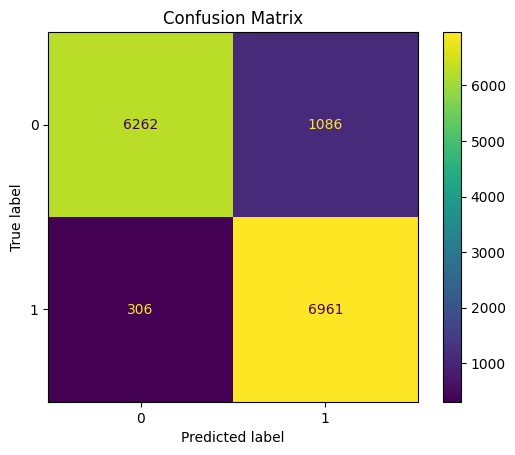

In [ ]:
# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=svc.classes_)

# Calculate True Positives, True Negatives, False Positives, and False Negatives
tp, tn, fp, fn = cm[1, 1], cm[0, 0], cm[0, 1], cm[1, 0]
print(f'True Positive: {tp}')
print(f'True Negative: {tn}')
print(f'False Positive: {fp}')
print(f'False Negative: {fn}')

# Calculate precision and recall scores
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print(f'precision_score: {precision}')
print(f'recall: {recall}')

# Plot the confusion matrix
disp.plot()
plt.title('Confusion Matrix')
plt.show()